# <u>smsspamcollection</u>

### Introduction to SMS Spam Classification Dataset  

The **SMS Spam Classification Dataset** consists of labeled SMS messages categorized as **ham (legitimate)** or **spam (unwanted)**. Each entry includes the message text along with additional features such as **message length** and **punctuation count**.  

This dataset is widely used for building and evaluating spam detection models using **Machine Learning (ML) and Natural Language Processing (NLP) techniques**.


## 1. Load Dataset

In [34]:
import pandas as pd
df = pd.read_csv("smsspamcollection.tsv", sep='\t')

In [35]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [36]:
df.shape

(5572, 4)

## 2. EDA [Exploratory Data Analysis]

In [37]:
# value_counts
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [38]:
# isnull
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [39]:
# duplicated
df.duplicated().sum()

403

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated().sum()

0

In [42]:
df.describe()

,length,punct
count,5169.000000,5169.000000
mean,79.344554,4.059199
std,58.437457,4.416667
min,2.000000,0.000000
25%,36.000000,1.000000
50%,61.000000,3.000000
75%,119.000000,5.000000
max,910.000000,133.000000


In [43]:
df.sample(5)

,label,message,length,punct
472,ham,"How long has it been since you screamed, princ...",50,2
4861,ham,Response is one of d powerful weapon 2 occupy ...,152,14
1031,ham,Can not use foreign stamps in this country. Go...,58,2
4440,ham,i want to grasp your pretty booty :),36,2
679,ham,Cause I'm not freaky lol,24,1


## 3. Data Preprocessing

In [44]:
from string import punctuation
from nltk.corpus import stopwords
stop = stopwords.words("english")
sw_list = list(punctuation) + stop

In [79]:
def text_cleaner(text):
    filtered_text = []
    from nltk.tokenize import word_tokenize
    tokenize = word_tokenize(text)
    for word in tokenize:
        if word.lower() not in sw_list:
            filtered_text.append(word)
    return " ".join(filtered_text)

In [80]:
df['message'] = df['message'].apply(text_cleaner)

## 4. Data Visualization

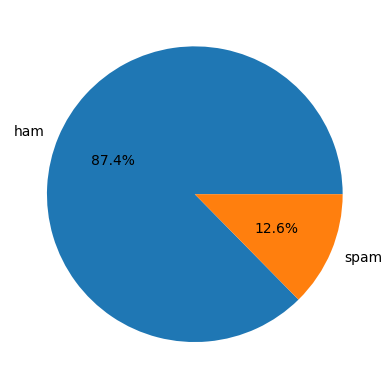

In [81]:
# Checking the percentage of ham and spam

import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), autopct='%1.1f%%', labels=['ham','spam'])
plt.show()

## 5. Separating, encoding & train_test_split

In [93]:
# separating
X = df['message']
y = df['label']

In [94]:
# encoding label column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## 6. Feature Extraction

In [96]:
# Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()  # X_test_bow only be transform

In [97]:
print(X_train_bow)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [98]:
print(X_test_bow)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 7. Model Building

In [99]:
# 1st model naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [100]:
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = gnb.predict(X_test_bow)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8849129593810445
[[811 108]
 [ 11 104]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       919
           1       0.49      0.90      0.64       115

    accuracy                           0.88      1034
   macro avg       0.74      0.89      0.78      1034
weighted avg       0.93      0.88      0.90      1034



## 8. Prediction

In [101]:
new_text_bow = cv.transform(["new year prize offer"]).toarray()
gnb.predict(new_text_bow)

array([1])

In [102]:
# 2nd model random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)

RandomForestClassifier()

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test_bow)  # predict test data
accuracy_score(y_test, y_pred)

0.9787234042553191

# Accuracy Using tfidf

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [112]:
# # Note: very important

# agr separating krte time
# x me iloc ka use kiya hai. then tfidf me X_train["col_name"] dalna pdega.

# and agr separating krte time X = df['message'] 
# ese use kiya hai. 
# to hm tfidf me direct X_train dal skte hai. koi error ni ayega.

In [113]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4135, 7685)
(1034, 7685)


### Naive bayes with tfidf

In [114]:
# applying model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tfidf,y_train)

GaussianNB()

In [119]:
# Metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = gnb.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8839458413926499
[[813 106]
 [ 14 101]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       919
           1       0.49      0.88      0.63       115

    accuracy                           0.88      1034
   macro avg       0.74      0.88      0.78      1034
weighted avg       0.93      0.88      0.90      1034



### Random Forest model with tfidf

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)  # fitting training data

RandomForestClassifier()

In [117]:
# predicting and accuracy_score
y_pred = rf.predict(X_test_tfidf) # predicting/testing on testing data

accuracy_score(y_test,y_pred) 

0.9806576402321083

In [118]:
# In percentage

accuracy = accuracy_score(y_test,y_pred)
accu = print(f"{accuracy:.2f}%")

0.98%


The Ham-Spam classifier using Random Forest with TF-IDF achieved **<span style="color:blue;">0.98%</span>** accuracy, highlighting its effectiveness in spam detection.


### Thank you!